In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('dataset_1.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
X = df.drop('target', axis=1)
y = df['target']

In [7]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2419    0
2420    0
2421    0
2422    0
2423    0
Name: target, Length: 2424, dtype: int64

In [9]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [10]:
X_train.shape, X_test.shape

((1818, 13), (606, 13))

In [11]:
X_train.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.118032,-0.068991,0.270715,0.224990,0.143908,-0.117200,-0.405475,0.100735,0.200720,-0.155287,0.287493,0.074281
sex,-0.118032,1.000000,-0.069095,-0.066163,-0.194766,0.036358,-0.062686,-0.038488,0.131136,0.088163,-0.013672,0.113495,0.191442
cp,-0.068991,-0.069095,1.000000,0.037315,-0.068987,0.092825,0.049356,0.288246,-0.400141,-0.144262,0.107814,-0.183679,-0.156789
trestbps,0.270715,-0.066163,0.037315,1.000000,0.130482,0.178189,-0.110103,-0.053083,0.079605,0.199454,-0.126198,0.096240,0.067750
chol,0.224990,-0.194766,-0.068987,0.130482,1.000000,0.017765,-0.146464,-0.009453,0.068700,0.063496,-0.013626,0.060505,0.118575
fbs,0.143908,0.036358,0.092825,0.178189,0.017765,1.000000,-0.083895,-0.015726,0.021751,0.006250,-0.060840,0.127803,-0.044223
restecg,-0.117200,-0.062686,0.049356,-0.110103,-0.146464,-0.083895,1.000000,0.039295,-0.073964,-0.045040,0.078381,-0.081411,-0.017300
thalach,-0.405475,-0.038488,0.288246,-0.053083,-0.009453,-0.015726,0.039295,1.000000,-0.377674,-0.347308,0.377015,-0.208643,-0.101959
exang,0.100735,0.131136,-0.400141,0.079605,0.068700,0.021751,-0.073964,-0.377674,1.000000,0.289944,-0.240764,0.108329,0.203623
oldpeak,0.200720,0.088163,-0.144262,0.199454,0.063496,0.006250,-0.045040,-0.347308,0.289944,1.000000,-0.579495,0.219035,0.190200


<Axes: >

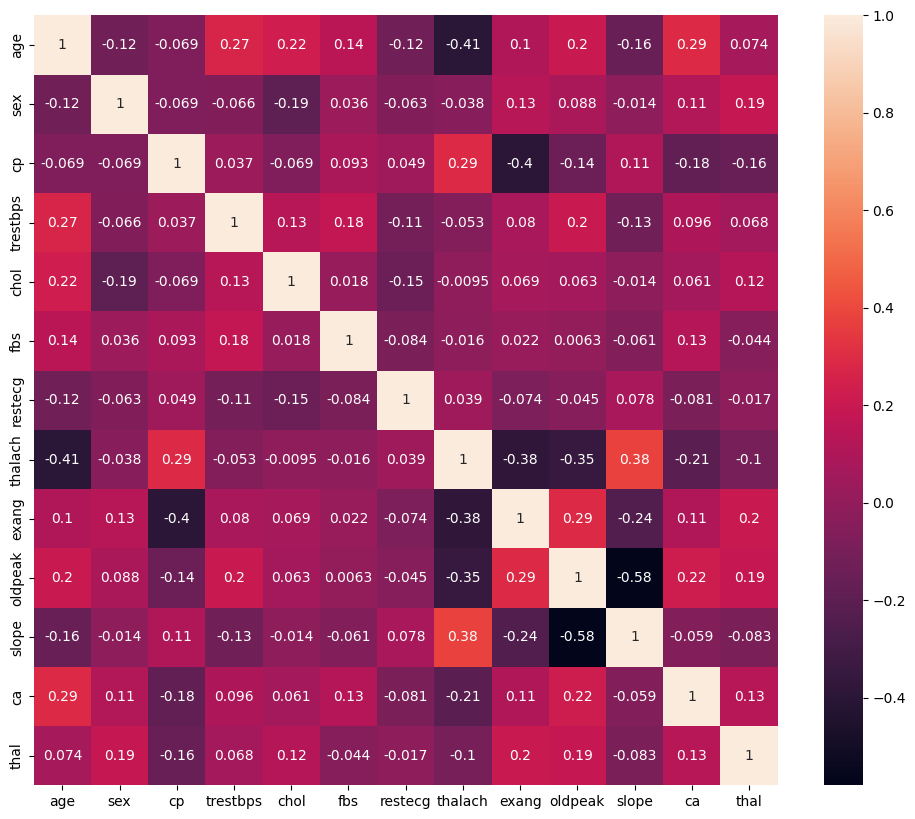

In [12]:
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [13]:
## Function to remove feature when it is greater than threshold value

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
corr_feature = correlation(X_train, 0.55)

In [15]:
corr_feature

{'slope'}

In [16]:
X_train.drop(corr_feature, axis = 1, inplace=True)
X_test.drop(corr_feature, axis = 1, inplace=True)
X_train.shape, X_test.shape

((1818, 12), (606, 12))

In [17]:
# Feature Scalling or standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [18]:
X_train_scalled

array([[ 1.5858163 ,  0.67668232,  1.96314974, ..., -0.82146108,
         0.27451785, -0.50835202],
       [ 1.25936344, -1.47779833,  1.96314974, ...,  1.32203451,
        -0.71965236, -0.50835202],
       [-0.04644801,  0.67668232, -0.94557579, ...,  0.12167698,
        -0.71965236, -0.50835202],
       ...,
       [ 0.06236962,  0.67668232, -0.94557579, ...,  3.89422922,
        -0.71965236,  1.14197651],
       [ 0.60645772, -1.47779833,  0.99357456, ..., -0.90720091,
         0.27451785, -0.50835202],
       [ 0.4976401 ,  0.67668232,  1.96314974, ..., -0.90720091,
        -0.71965236, -0.50835202]])

/tmp/ipykernel_1221/3021704473.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train after scaling')

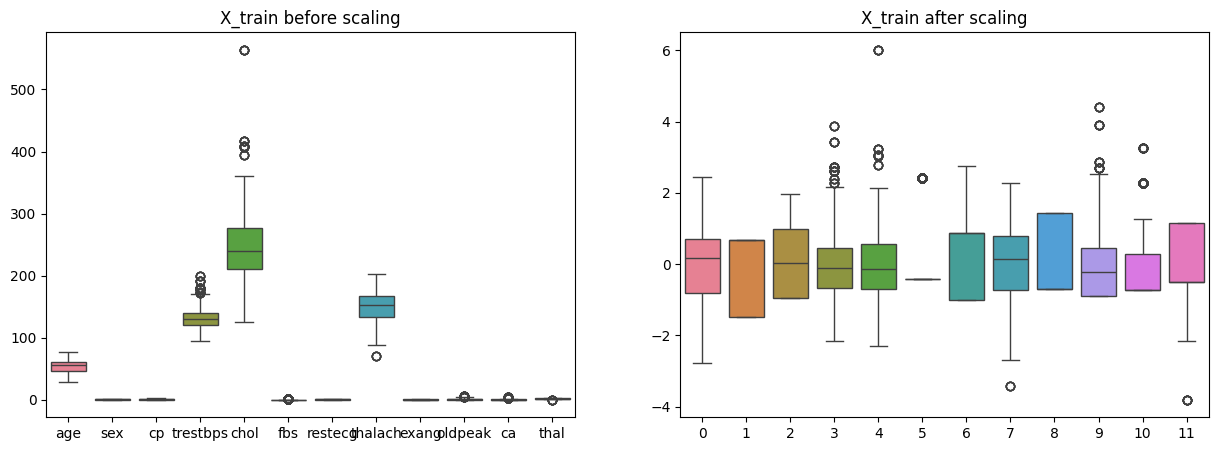

In [19]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title('X_train before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scalled)
plt.title('X_train after scaling')

## Linear regression model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scalled, y_train)
y_pred = linreg.predict(X_test_scalled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean absolute error', mae)
print('R2 Score', score)

Mean absolute error 0.28863237274292847
R2 Score 0.4723404989389465


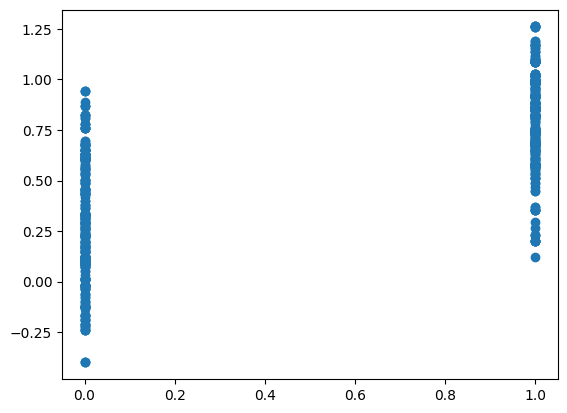

In [21]:
plt.scatter(y_test, y_pred)

## Lasso Regression

Mean absolute error 0.4974675685390321
R2 Score -0.002795248078266921


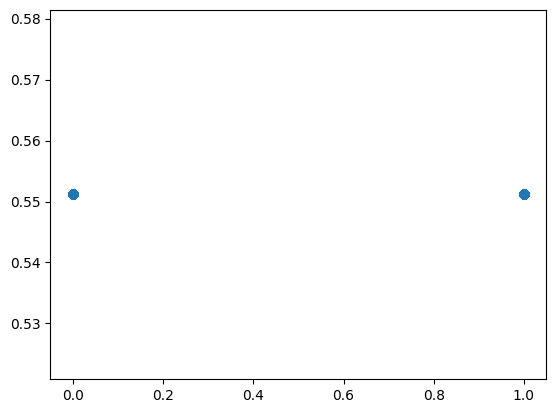

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scalled, y_train)
y_pred = lasso.predict(X_test_scalled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [23]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scalled,y_train)

LassoCV(cv=5)

Mean absolute error 0.28866374138700546
R2 Score 0.47265860420804584


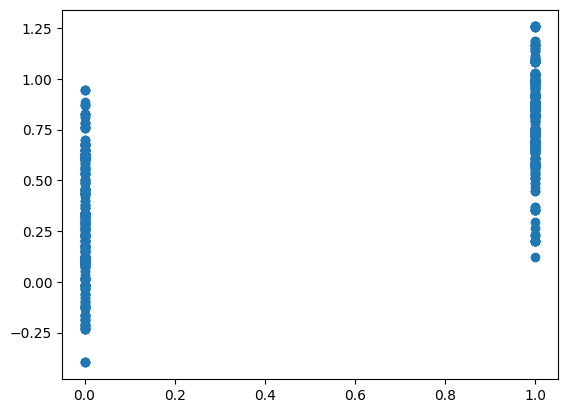

In [24]:
y_pred=lassocv.predict(X_test_scalled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scalled,y_train)
y_pred=ridge.predict(X_test_scalled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.2886356755579093
R2 Score 0.4723641736489437


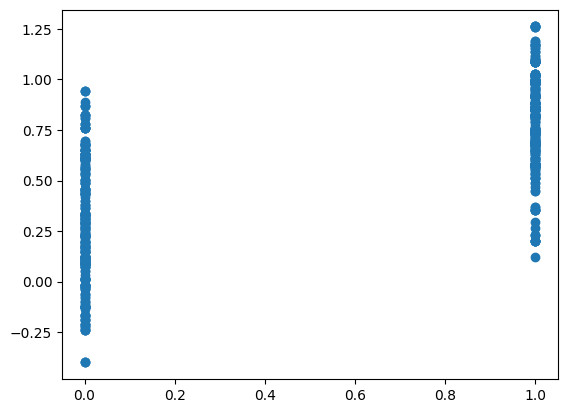

In [26]:
plt.scatter(y_test,y_pred)

Mean absolute error 0.2886691671233125
R2 Score 0.4725723089854589


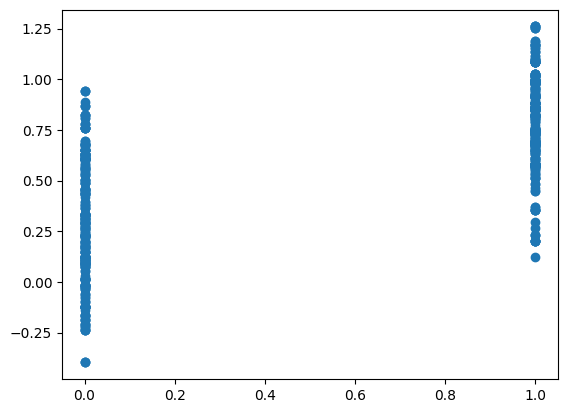

In [27]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scalled,y_train)
y_pred=ridgecv.predict(X_test_scalled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [28]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elastic net Regression

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scalled,y_train)
y_pred=elastic.predict(X_test_scalled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.4974675685390321
R2 Score -0.002795248078266921


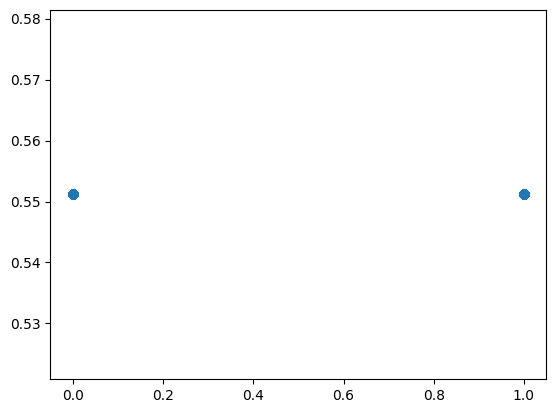

In [30]:
plt.scatter(y_test,y_pred)

Mean absolute error 0.2886750628063776
R2 Score 0.47273593449553486


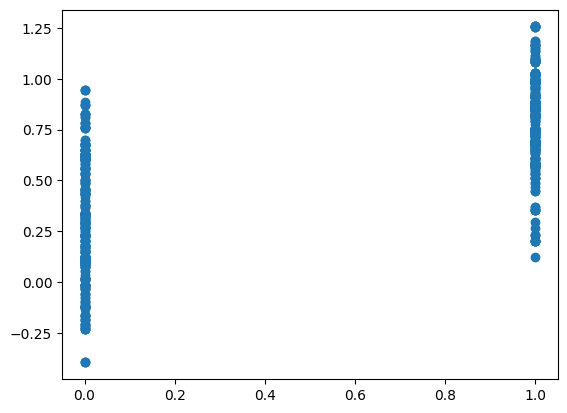

In [31]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scalled,y_train)
y_pred=elasticcv.predict(X_test_scalled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [32]:
# Pickel the machine learning models, preprocessing models standard scaler
scaler

StandardScaler()

In [33]:
ridge

Ridge()

In [34]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))